# Relationship between Turnout and Votes for PRO-EU Parties in Italy
**Author:** Stefano Chiesa


Is there a relationship between the turnout of the European Parliament elections in Italy and the percentage of votes received by pro-EU parties? In this project, I will analyze the data from the European Parliament elections in Italy to answer this question. 

I performed the following steps:
- Load and inspect the data;
- Calculate the correlation between the turnout and the votes for pro-EU parties;
- Create a scatter plot to visualize the relationship between turnout and votes for pro-EU parties;
- Fit a linear regression model to the data.




**Data Sources:**
- Europa Elections: https://results.elections.europa.eu/en/tools/download-datasheets/
- BiDiMedia: https://www.youtube.com/watch?v=WGWWdETT0Kk


## Load and Inspect the Data
Note that the data includes a binary column **"PRO_EU"**, assigned to each party, indicating whether the party is pro-EU or not. This is a value assigned based on my knowledge of Italian politics and internet research. When I wasn't sure about whether a party should be classified as pro-EU or not, I assigned a value of NA. 

Someone might disagree with my classification, feel free to contact me if you have any suggestions.

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [142]:
# Data About the EU Elections in Italy
df_elections = pd.read_excel('data/all_data.xlsx')
df_elections

,NAME,VOTES,%,YEAR,PRO_EU
0,DC,12774320,36.45,1979,1
1,PCI,10361344,29.57,1979,0
2,PSI,3866946,11.03,1979,1
3,MSI-DN,1909055,5.45,1979,0
4,PSDI,1514272,4.32,1979,1
...,...,...,...,...,...
149,POPOLARI PER L'ITALIA,80553,0.30,2019,0
150,PARTITO PIRATA,60809,0.23,2019,1
151,FORZA NUOVA,41077,0.15,2019,0
152,AUTONOMIE PER L'EUROPA,17692,0.07,2019,0


In [130]:
# Data About Turnout of the EU Elections in Italy
df_turnout = pd.read_excel('data/turnout.xlsx')
df_turnout

,YEAR,%
0,1979,85.65
1,1984,82.47
2,1989,81.07
3,1994,73.60
4,1999,69.76
5,2004,71.72
6,2009,66.47
7,2014,57.22
8,2019,54.50


## Calculate the correlation between the turnout and the votes for pro-EU parties

In [131]:
# Filter df_elections to only include rows where 'PRO_EU' is 1
df_pro_eu = df_elections[df_elections['PRO_EU'] == 1]

# Group df_pro_eu by 'YEAR' and sum the '%' column
df_pro_eu_summed = df_pro_eu.groupby('YEAR')['%'].sum().reset_index()

# Merge the new DataFrame with df_turnout
df_merged = pd.merge(df_pro_eu_summed, df_turnout, on='YEAR', suffixes=('_elections', '_turnout'))

# Calculate the correlation between the summed '%' column and the '%' column from the turnout dataframe
correlation = df_merged['%_elections'].corr(df_merged['%_turnout'])

print(correlation)

0.3552289279799076


The correlation coefficient is approximately 0.35, indicating a weak positive relationship between the turnout of the European Parliament elections in Italy and the percentage of votes received by pro-EU parties.

## Create a scatter plot to visualize the relationship between turnout and votes for pro-EU parties

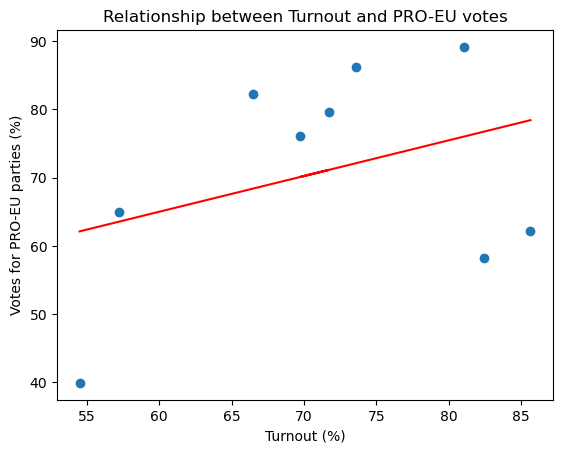

In [132]:
# Create a scatter plot
plt.scatter(df_merged['%_turnout'], df_merged['%_elections'])

# Calculate the coefficients for the line of best fit
m, b = np.polyfit(df_merged['%_turnout'], df_merged['%_elections'], 1)

# Add the line of best fit to the plot
plt.plot(df_merged['%_turnout'], m*df_merged['%_turnout'] + b, color='red')

# Set the labels for the x and y axes
plt.xlabel('Turnout (%)')
plt.ylabel('Votes for PRO-EU parties (%)')

# Set the title for the plot
plt.title('Relationship between Turnout and PRO-EU votes')

# Display the plot
plt.show()

Even though the correlation suggests a positive relationship between voter turnout and votes for pro-EU parties, there isn't a clear pattern. The two points with the highest turnout (1979 and 1984) fall between those with the lowest percentage of votes for pro-EU parties.

On the other hand, the third point with the highest turnout (1989) has a higher percentage of votes for pro-EU parties compared to all the others. 

This is due to the positioning of the **Italian Comunist Party (Partito Comunista Italiano - PCI)** in the political spectrum: the PCI was eurosceptic and had a high percentage of votes in the 1979 and 1984 elections, while it changed its position in the 1989 elections.

In [48]:
# Exclude the Years when PCI was eurosceptic
df_turnout_2 = df_turnout[-df_turnout['YEAR'].isin([1979, 1984])]
df_elections_2 = df_elections[-df_elections['YEAR'].isin([1979, 1984])]

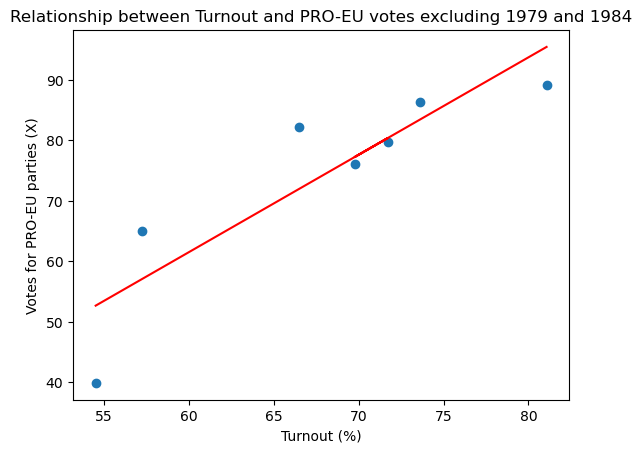

In [122]:
# Filter df_elections_2 to only include rows where 'PRO_EU' is 1
df_pro_eu_2 = df_elections_2[df_elections_2['PRO_EU'] == 1]

# Group df_pro_eu_2 by 'YEAR' and sum the '%' column
df_pro_eu_summed_2 = df_pro_eu_2.groupby('YEAR')['%'].sum().reset_index()

# Merge the new DataFrame with df_turnout_2
df_merged_2 = pd.merge(df_pro_eu_summed_2, df_turnout_2, on='YEAR', suffixes=('_elections', '_turnout'))

# Create a scatter plot
plt.scatter(df_merged_2['%_turnout'], df_merged_2['%_elections'])

# Calculate the coefficients for the line of best fit
m, b = np.polyfit(df_merged_2['%_turnout'], df_merged_2['%_elections'], 1)

# Add the line of best fit to the plot
plt.plot(df_merged_2['%_turnout'], m*df_merged_2['%_turnout'] + b, color='red')

# Set the labels for the x and y axes
plt.xlabel('Turnout (%)')
plt.ylabel('Votes for PRO-EU parties (X)')

# Set the title for the plot
plt.title('Relationship between Turnout and PRO-EU votes excluding 1979 and 1984')

# Display the plot
plt.show()

Excluding the years when the PCI was eurosceptic, the relationship between voter turnout and votes for pro-EU parties seems to be more linear. The points are more aligned, and the line of best fit provides a better representation of the data.

However, in my opinion, **there is no reasonable reason to exclude those years from the analysis**. 
The PCI was a significant party in Italy, and its position in the political spectrum changed significantly the percentage of votes for pro-EU parties, **indipendentely from the turnout**.


If, to be absurd, I decided that excluding the 1979 and 1984 elections was the right choice, the hypothesis would not hold. 


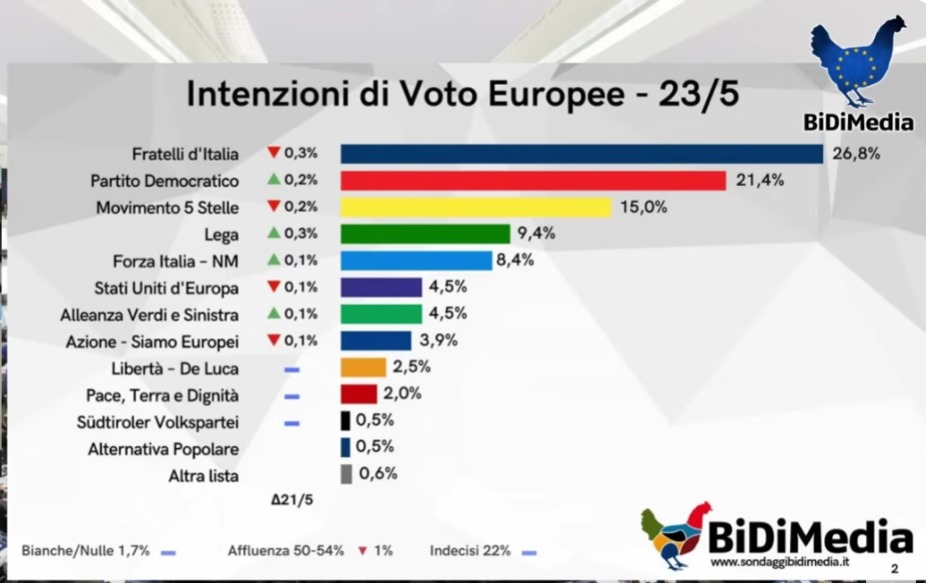

In [156]:
Image("images/poll.jpg")

*±3.5% is the margin of error with a 95% confidence level for a sample of 810 people.*

*The turnout is estimated between 50% and 54%, lower than the 54,5% of the 2019 elections.*

The only major party that is running a campaign based on eurocepticism is **Lega**, but it's important to underline that their position changed a lot compared to the past. They don't want anymore Italy to leave the Eurozone, but they want to reform the European Union. 

Similarly, **Five Star Movement** and **Fratelli d'Italia** changed their opinion about the EU institutions.

Hence, it's hard to classify them as eurosceptic parties and, following the criteria used for the other years, there would be no major eurosceptic parties in Italy in 2024 elections.

Assuming that Lega, which is the party that is running the most critical campaign against the EU, is the only eurosceptic party, the percentage of votes for pro-EU parties would still be higher than the level of predicted turnout would suggest.

Someone might argue that classifying a party as PRO-EU is not just about the acceptance of the EU institutions, but also about the willingness to deepen the European integration. For example, during the 2024 campaign, two main views could be identified: one that wants to deepen European integration to create a federal Europe, and one that wants to keep the union intergovernmental.
 However, this is an even harder classification to make, and it would be even more subjective.
Additionally, even though there always has been different points of views about the European integration, the debate about the EU institutional reforms has just recently become relevant in Italy, meaning that it's almost impossible to classify the past parties based on this criterion.



## Limits of the analysis:
The analysis has some limitations:
- The classification of parties as pro-EU or not is subjective and based on my knowledge of Italian politics and internet research. There might be disagreements about the classification of some parties;
- The data only includes the European Parliament elections in Italy, and the relationship between voter turnout and votes for pro-EU parties might differ in other elections or countries.

Don't hesitate to contact me if you have any suggestions or questions.